In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2009 = "../../datasets/subsets/supp_ex/supp_ex_2009.csv"

supp_2009 = pd.read_csv(file_2009)
supp_2009 = supp_2009.set_index(['STNAME'])
supp_2009

,2009_E212,2009_E213,2009_E214,2009_E215,2009_E216,2009_E217,2009_E218,2009_E222,2009_E223,2009_E224,...,2009_E256,2009_E257,2009_E258,2009_E262,2009_E263,2009_E264,2009_E265,2009_E266,2009_E267,2009_E268
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,218598213,189762357,71184884,282653574,170070779,152064396,64029895,83537042,69341406,22926533,...,2935238,25079670.0,869755,2615936.0,3021855.0,58179561.0,2358676.0,100743.0,59698.0,3204958
alaska,84983545,46874011,12355195,69752634,67886077,6167951,32541122,55820432,29028881,7914502,...,2235511,292093.0,1324311,821364.0,789728.0,1626068.0,169539.0,120699.0,15713.0,711127
arizona,621710031,162135644,54124929,306330487,297985788,160747142,147158904,88860221,42913740,15225290,...,42447103,49521341.0,19968959,141101527.0,540530.0,13332958.0,3207247.0,42258076.0,5572097.0,127700465
arkansas,143106864,189205817,59339154,170542081,132707149,78594101,55462532,36317751,45850577,16866689,...,7930013,16052279.0,5007880,423486.0,3351401.0,8877793.0,656145.0,1153445.0,1111205.0,3974222
california,2116373146,2298776020,279433556,2824039341,2359728262,573206192,1404595912,655428664,704435700,106677907,...,42259441,41023849.0,32646024,318132.0,2906526.0,10965601.0,1857823.0,224567.0,107747.0,7361777
colorado,243220644,252778033,51040284,367059537,270066126,133549118,178520482,56242895,57141798,11694296,...,19934710,23495710.0,43467583,3907423.0,2639914.0,4833923.0,3480042.0,414675.0,127509.0,5498386
connecticut,353386987,151305538,92063551,338180281,293743015,26904418,97808453,137294526,57216137,40956283,...,33083734,2403956.0,7895300,1640826.0,2166005.0,5030657.0,2150493.0,4370072.0,2122777.0,5010311
delaware,47100478,11433024,9774089,56528961,51674997,16820771,33615923,20352215,4948553,4180865,...,1641075,623257.0,58075,4832.0,NaN,NaN,NaN,NaN,NaN,3428326
district of columbia,89300365,54365473,23972681,88636110,33033430,214380,41024320,9645303,8402356,4338137,...,6655273,NaN,7119716,468637.0,455462.0,1842949.0,346729.0,866535.0,80461.0,1756402


In [3]:
(supp_2009.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    21.888310
texas         14.392865
new york      14.238937
illinois       9.378581
new jersey     8.822355
dtype: float64

In [4]:
summary_2009 = pd.DataFrame(supp_2009.sum(axis=1)/100000000, columns=['Total SupportEx ($100M)'])
summary_2009['Salaries SupportEx ($100M)'] = supp_2009.iloc[:,0:7].sum(axis=1)/100000000
summary_2009['Benefits SupportEx ($100M)'] = supp_2009.iloc[:,7:14].sum(axis=1)/100000000
summary_2009['Services SupportEx ($100M)'] = supp_2009.iloc[:,14:21].sum(axis=1)/100000000
summary_2009['Supplies SupportEx ($100M)'] = supp_2009.iloc[:,21:28].sum(axis=1)/100000000
summary_2009['Property SupportEx ($100M)'] = supp_2009.iloc[:,28:35].sum(axis=1)/100000000
summary_2009['Other SupportEx ($100M)'] = supp_2009.iloc[:,35:42].sum(axis=1)/100000000
summary_2009

,Total SupportEx ($100M),Salaries SupportEx ($100M),Benefits SupportEx ($100M),Services SupportEx ($100M),Supplies SupportEx ($100M),Property SupportEx ($100M),Other SupportEx ($100M)
STNAME,,,,,,,
alabama,23.689011,11.483641,4.970152,2.624017,3.606443,0.309343,0.695414
alaska,8.298543,3.205605,2.126674,1.711259,1.128025,0.084436,0.042542
arizona,35.346185,17.501929,4.240530,5.356911,3.464885,1.444801,3.337129
arkansas,15.761509,8.289577,2.152005,2.461498,2.251160,0.411792,0.195477
california,218.883102,118.561524,41.276856,36.136210,21.323292,1.347797,0.237422
colorado,28.625103,14.962342,3.578182,6.032032,2.838233,1.005296,0.209019
connecticut,30.384296,13.533922,5.416728,7.773253,2.809269,0.626211,0.224911
delaware,5.358362,2.269482,0.992014,1.870336,0.160158,0.032039,0.034332
district of columbia,7.461323,3.305468,0.556961,2.321726,0.615428,0.603569,0.058172


In [5]:
summary_pct = pd.DataFrame(summary_2009['Salaries SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100, columns = ['Salaries (%)'])
summary_pct['Benefits (%)'] = summary_2009['Benefits SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100
summary_pct['Services (%)'] = summary_2009['Services SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100
summary_pct['Supplies (%)'] = summary_2009['Supplies SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100
summary_pct['Property (%)'] = summary_2009['Property SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100
summary_pct['Other (%)'] = summary_2009['Other SupportEx ($100M)'] / summary_2009['Total SupportEx ($100M)'] *100
summary_pct

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%)
STNAME,,,,,,
alabama,48.476659,20.980833,11.076937,15.224120,1.305852,2.935599
alaska,38.628534,25.627078,20.621205,13.593052,1.017483,0.512649
arizona,49.515752,11.997136,15.155555,9.802712,4.087574,9.441271
arkansas,52.593803,13.653545,15.617144,14.282644,2.612646,1.240217
california,54.166596,18.857946,16.509365,9.741863,0.615761,0.108470
colorado,52.270003,12.500153,21.072524,9.915188,3.511939,0.730194
connecticut,44.542491,17.827395,25.583127,9.245794,2.060971,0.740223
delaware,42.354034,18.513382,34.905005,2.988942,0.597926,0.640710
district of columbia,44.301361,7.464636,31.116813,8.248246,8.089301,0.779644


In [6]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2009.csv"

success_2009 = pd.read_csv(dropout_path)
success_2009

,STNAME,2009_DRP912,2009_DRP9,2009_DRP10,2009_DRP11,2009_DRP12,2009_DRPAM,2009_DRPAS,2009_DRPHI,2009_DRPBL,2009_DRPWH
0,alabama,1.500000,1.299999,1.599999,1.700000,1.500000,1.200000,0.700000,1.599999,1.700000,1.400000
1,alaska,7.000000,3.699999,5.399998,9.399994,9.500000,1.200000,NaN,0.200000,0.500000,0.200000
2,arizona,8.299995,8.000000,6.299999,7.899998,11.000000,12.899994,5.000000,10.199997,10.099998,6.099998
3,arkansas,4.099998,2.299999,3.699999,5.199997,5.599998,4.500000,3.799999,4.699997,5.699997,3.500000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.799999,2.400000,6.199997,9.199997,3.199999
5,colorado,6.099998,4.099998,4.500000,6.299999,10.000000,12.299995,3.400000,11.399994,9.599998,3.699999
6,connecticut,3.099998,2.699999,2.799999,3.299999,3.599998,2.400000,0.900000,7.399998,6.799999,1.400000
7,delaware,5.099998,6.099998,5.299999,4.399998,4.399998,5.399998,2.299999,6.599998,6.899998,4.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.299999,8.299995,6.899998,4.799999
9,florida,2.599998,2.400000,2.599998,2.699999,2.900000,2.900000,0.900000,3.000000,4.299999,1.799999


In [7]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_pct['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
alabama,48.476659,20.980833,11.076937,15.224120,1.305852,2.935599,1.5
alaska,38.628534,25.627078,20.621205,13.593052,1.017483,0.512649,7
arizona,49.515752,11.997136,15.155555,9.802712,4.087574,9.441271,8.3
arkansas,52.593803,13.653545,15.617144,14.282644,2.612646,1.240217,4.1
california,54.166596,18.857946,16.509365,9.741863,0.615761,0.108470,5
colorado,52.270003,12.500153,21.072524,9.915188,3.511939,0.730194,6.1
connecticut,44.542491,17.827395,25.583127,9.245794,2.060971,0.740223,3.1
delaware,42.354034,18.513382,34.905005,2.988942,0.597926,0.640710,5.1
district of columbia,44.301361,7.464636,31.116813,8.248246,8.089301,0.779644,7


In [8]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
illinois,44.381113,17.911182,22.929528,9.265984,4.574557,0.937635,11.5
arizona,49.515752,11.997136,15.155555,9.802712,4.087574,9.441271,8.3
alaska,38.628534,25.627078,20.621205,13.593052,1.017483,0.512649,7
district of columbia,44.301361,7.464636,31.116813,8.248246,8.089301,0.779644,7
louisiana,47.041301,16.609161,22.980313,10.316302,1.508318,1.544605,6.8
colorado,52.270003,12.500153,21.072524,9.915188,3.511939,0.730194,6.1
north carolina,56.190627,14.130069,15.014320,11.211363,3.334435,0.119185,5.3
nevada,54.979629,21.039644,11.443415,10.410672,1.369161,0.757480,5.1
delaware,42.354034,18.513382,34.905005,2.988942,0.597926,0.640710,5.1


In [9]:
summary_2009['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_2009['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    

summary_2009 = summary_2009[summary_2009['Dropout Rate'].notna()]
summary_2009['Dropout Rate'] = summary_2009['Dropout Rate'].astype(float)
summary_2009.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total SupportEx ($100M)     51 non-null     float64
 1   Salaries SupportEx ($100M)  51 non-null     float64
 2   Benefits SupportEx ($100M)  51 non-null     float64
 3   Services SupportEx ($100M)  51 non-null     float64
 4   Supplies SupportEx ($100M)  51 non-null     float64
 5   Property SupportEx ($100M)  51 non-null     float64
 6   Other SupportEx ($100M)     51 non-null     float64
 7   Dropout Rate                51 non-null     float64
dtypes: float64(8)
memory usage: 3.6+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


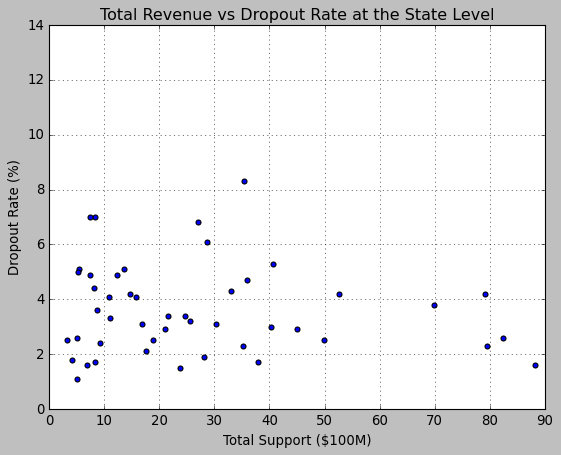

In [10]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2009['Total SupportEx ($100M)'], summary_2009['Dropout Rate'])
plt.xlabel('Total Support ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

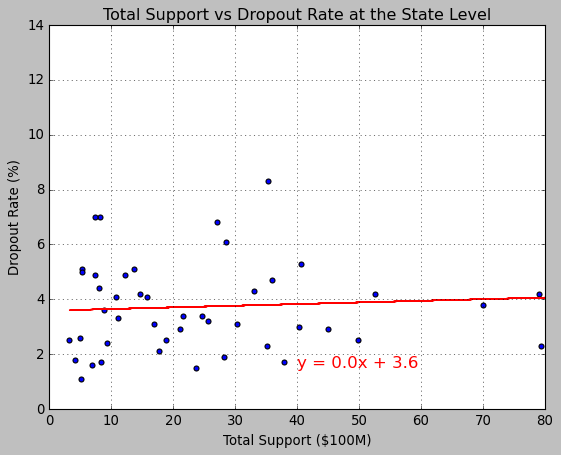

The correlation between both factors is 0.1288


In [11]:
# Total Support vs Dropout Rate
x_values = summary_2009['Total SupportEx ($100M)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Support ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Support vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [12]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_pct['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salaries (%)  51 non-null     float64
 1   Benefits (%)  51 non-null     float64
 2   Services (%)  51 non-null     float64
 3   Supplies (%)  51 non-null     float64
 4   Property (%)  51 non-null     float64
 5   Other (%)     51 non-null     float64
 6   Dropout Rate  51 non-null     float64
dtypes: float64(7)
memory usage: 3.2+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


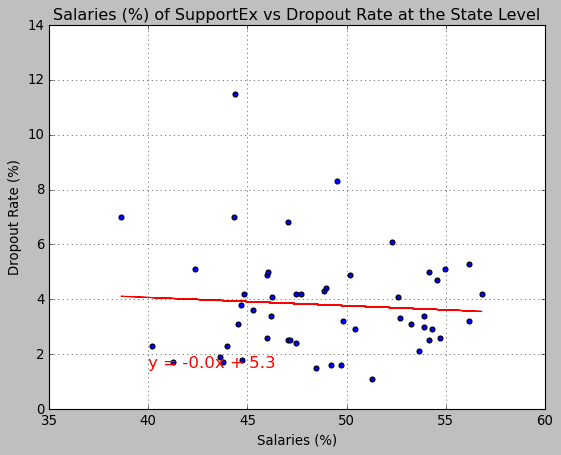

The correlation between both factors is -0.0712


In [13]:
# Salaries (%) vs Dropout Rate
x_values = summary_pct['Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 35, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

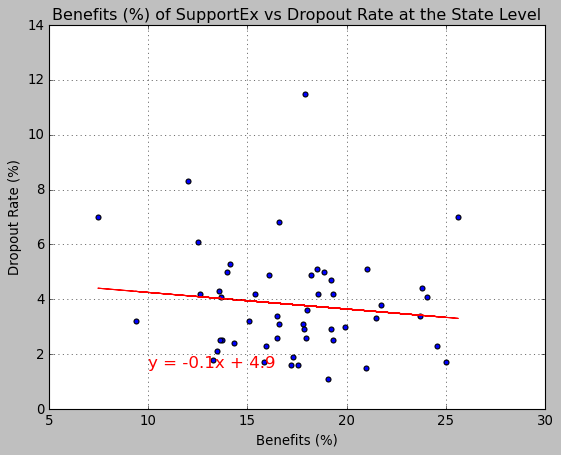

The correlation between both factors is -0.1228


In [14]:
# Benefits (%) vs Dropout Rate
x_values = summary_pct['Benefits (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Benefits (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Benefits (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

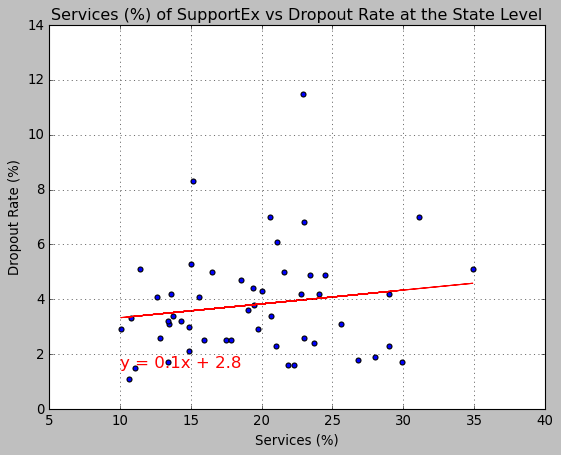

The correlation between both factors is 0.1552


In [15]:
# Services (%) vs Dropout Rate
x_values = summary_pct['Services (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Services (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Services (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

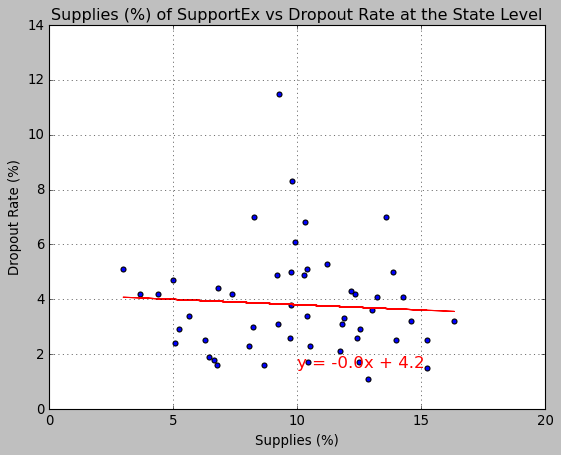

The correlation between both factors is -0.0655


In [16]:
# Supplies (%) vs Dropout Rate
x_values = summary_pct['Supplies (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Supplies (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Supplies (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 20)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

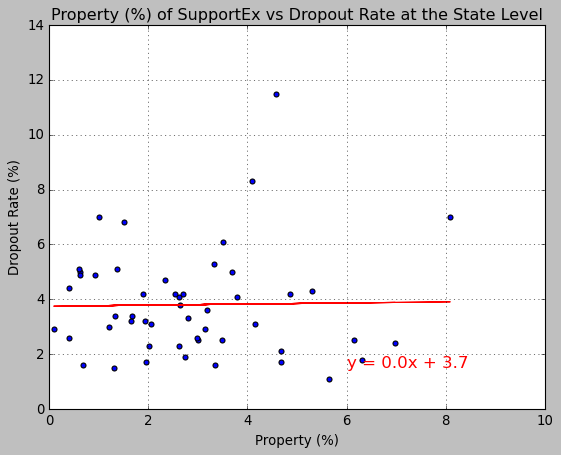

The correlation between both factors is 0.0185


In [17]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Property (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Property (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Property (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

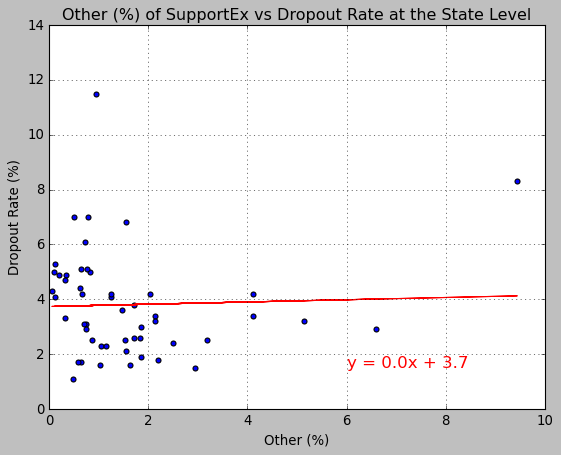

The correlation between both factors is 0.0364


In [18]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Other (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Other (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")